<br>
# ** 6 ARIMA Analysis**
통계를 활용한 시계열 데이터 분석

<br><br>
## **ARIMA 시계열 분석을 활용한 주가예측**

### **1 시계열 데이터의 AR, MA 특성 찾기**
1. **AR(자기회귀)의 특성** : 고유한 값을 기준으로 이동
1. **MA(이동평균)의 특성** : 이동평균

In [1]:
from pandas_datareader import get_data_yahoo
stock = get_data_yahoo('MS', '2016-07-01', '2016-12-31')
stock = stock.fillna('ffill')
stock = stock.dropna()
price = stock.Close
price.tail(3)

Date
2016-12-28    42.619999
2016-12-29    42.150002
2016-12-30    42.250000
Name: Close, dtype: float64

<br>
### ** 01-1. ACF & PACF Plots**
1. AR이 크면 ACF는 천천히 감소, **PACF는 급격**하게 감소
1. MA가 크면 **ACF는 급격**히 감소, PACF는 천천히 감소

> pip &nbsp;&nbsp; install &nbsp;&nbsp; statsmodels==0.8.0

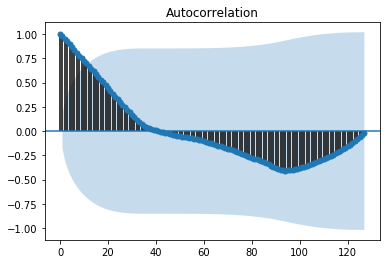

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(price)
plt.show()

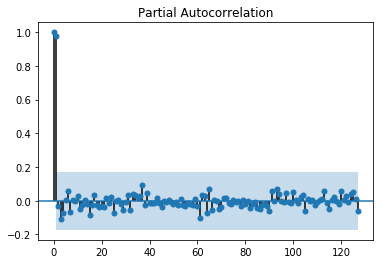

In [3]:
plot_pacf(price)
plt.show()

<br>
### ** 01-2. ACF & PACF Plots 2**

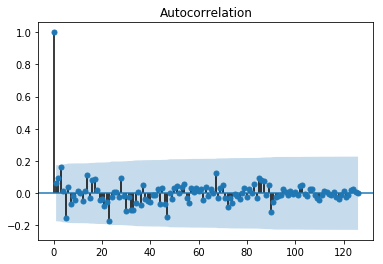

In [4]:
diff_1 = price.diff(periods=1).dropna()
plot_acf(diff_1)
plt.show()

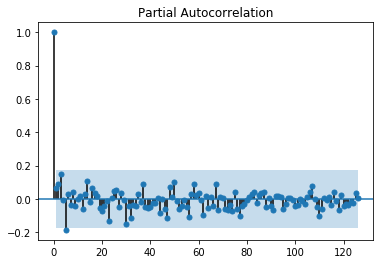

In [5]:
plot_pacf(diff_1)
plt.show()

<br>
## ** 2 모형을 만들고 통계적 검정**
statemodels

<br>
### **01 선형회귀모델의 생성 및 통계적해석**
**OLS**

In [6]:
from sklearn.datasets import load_iris 
data = load_iris()

import pandas as pd
df = pd.DataFrame(data.data)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['class'] = [data.target_names[no]   for no in data.target]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Text(0.5,0,'Sepal Width')

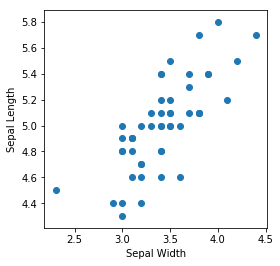

In [7]:
# 'sepal_width', 'sepal_length'
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(df['sepal_width'][:50], df['sepal_length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')

In [8]:
import statsmodels.api as sm

y = df['sepal_length'][:50]
x = df['sepal_width'][:50]
X = sm.add_constant(x)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           4.75e-10
Time:                        14:07:23   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

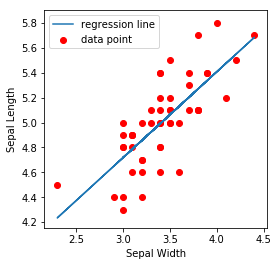

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.legend()

<br>
### **02 ARMA 모델의 생성 및 통계적해석**
**ARMA**

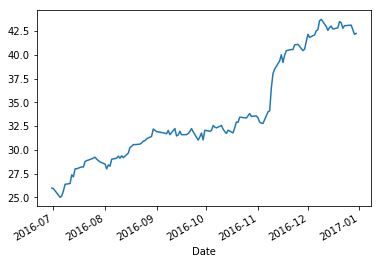

In [10]:
price.plot()

In [11]:
import statsmodels.tsa.api as tsa
ARMA = tsa.ARMA(price, order =(2, 1))
ARMA

In [12]:
ARMA_results= ARMA.fit()
ARMA_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 205.5509  
Dependent Variable: Close            Log-Likelihood:      -90.645   
Date:               2018-06-10 14:07 Scale:               1.0000    
No. Observations:   128              Method:              css-mle   
Df Model:           4                Sample:              06-30-2016
Df Residuals:       124                                   12-30-2016
Converged:          1.0000           S.D. of innovations: 0.481     
AIC:                191.2907         HQIC:                197.085   
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const           33.2603    3.4623    9.6064  0.0000  26.4743  40.0464
ar.L1.Close      1.9670    0.0500   39.3346  0.0000   1.8690   2.0650
ar.L2.Close     -0.9680    0.0499  -19.4145  0.0000  -1.0658  -0.8703
ma.L1.Close     -0.9027    0.0958   -9.4185  0.0000  -1.0906  -0.7149
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.0160            -0.0288           1.0164            -0.0045
AR.2            1.0160             0.0288           1.0164             0.0045
MA.1            1.1078             0.0000           1.1078             0.0000
====================================================================

"""

### **03 ARIMA 모델의 생성 및 통계적해석**
**ARIMA**

In [13]:
from statsmodels.tsa.arima_model import ARIMA

model     = ARIMA (price, order = (0, 0, 3))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  128
Model:                     ARMA(0, 3)   Log Likelihood                -221.033
Method:                       css-mle   S.D. of innovations              1.340
Date:                Sun, 10 Jun 2018   AIC                            452.067
Time:                        14:07:24   BIC                            466.327
Sample:                    06-30-2016   HQIC                           457.861
                         - 12-30-2016                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          33.7165      0.578     58.333      0.000      32.584      34.849
ma.L1.Close     1.7315      0.067     25.907      0.000       1.601       1.863
ma.L2.Close     1.5434      0.080     19.399    

In [14]:
model = ARIMA(price, order = (0,0,3))
model_fit = model.fit(trend = 'c', full_output = True, disp = 1)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  128
Model:                     ARMA(0, 3)   Log Likelihood                -221.033
Method:                       css-mle   S.D. of innovations              1.340
Date:                Sun, 10 Jun 2018   AIC                            452.067
Time:                        14:07:24   BIC                            466.327
Sample:                    06-30-2016   HQIC                           457.861
                         - 12-30-2016                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          33.7165      0.578     58.333      0.000      32.584      34.849
ma.L1.Close     1.7315      0.067     25.907      0.000       1.601       1.863
ma.L2.Close     1.5434      0.080     19.399    

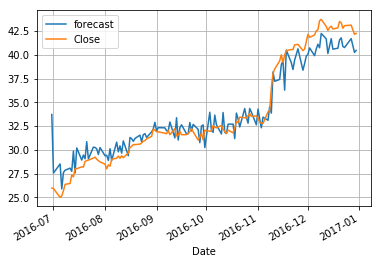

In [15]:
model_fit.plot_predict()
plt.grid()
plt.show()

### **04 ARIMA 모델로 데이터 예측하기**
**ARIMA Forcast**

In [16]:
fore = model_fit.forecast(steps = 10)
len(fore)

3

In [17]:
fore[0]

array([40.82041942, 37.72716018, 34.89254486, 33.71654643, 33.71654643,
       33.71654643, 33.71654643, 33.71654643, 33.71654643, 33.71654643])

In [18]:
fore[1]

array([1.33995673, 2.6793152 , 3.38462315, 3.49737058, 3.49737058,
       3.49737058, 3.49737058, 3.49737058, 3.49737058, 3.49737058])

In [19]:
fore[2].shape

(10, 2)

예측주가 : [40.82041942 37.72716018 34.89254486 33.71654643 33.71654643 33.71654643
 33.71654643 33.71654643 33.71654643 33.71654643] 
stderr : 1.3399567270768424 
upper bound : 38.19415249217149 
lower bound : 43.44668634399705


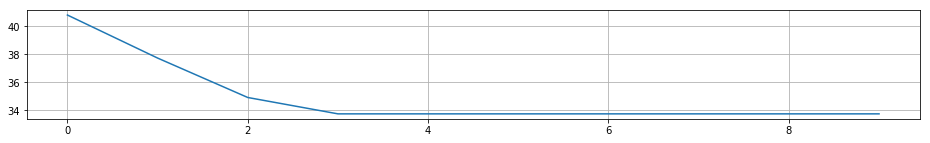

In [20]:
print('예측주가 : {} \nstderr : {} \nupper bound : {} \nlower bound : {}'.format(
    fore[0], 
    fore[1][0], 
    fore[2][0][0], 
    fore[2][0][1]))

pd.Series(fore[0]).plot(figsize=(16,2), grid=True)